In [1]:
import xarray as xr
import pandas as pd
import numpy as np
import enso

https://nci-data-training.readthedocs.io/en/latest/_notebook/climate/1_05_Xarray_calculate_Nino34_time_series_for_ARCCSS1-3_CMIP5.html

Nino 3.4 index
The definition of Nino 3.4 index can be found here.

Niño 3.4 (5N-5S, 170W-120W): The Niño 3.4 anomalies may be thought of as representing the average equatorial SSTs across the Pacific from about the dateline to the South American coast. The Niño 3.4 index typically uses a 5-month running mean, and El Niño or La Niña events are defined when the Niño 3.4 SSTs exceed +/- 0.4C for a period of six months or more.

Nino X Index computation: (a) Compute area averaged total SST from Niño X region; (b) Compute monthly climatology (e.g., 1950-1979) for area averaged total SST from Niño X region, and subtract climatology from area averaged total SST time series to obtain anomalies; (c) Smooth the anomalies with a 5-month running mean; (d) Normalize the smoothed values by its standard deviation over the climatological period.

In [59]:
ds = xr.open_dataset('/glade/scratch/molina/amoc_exp/b.e11.B1850LENS.f09_g16.FWAtSalG02Sv.cam.h0.Q.015101-020012.nc')

In [52]:
# pd.to_datetime(ds.time.values[3].strftime('%Y-%m-%d'))

In [53]:
ds['Q']

<xarray.DataArray 'Q' (time: 600, lev: 30, lat: 192, lon: 288)>
[995328000 values with dtype=float32]
Coordinates:
  * lev      (lev) float64 3.643 7.595 14.36 24.61 ... 936.2 957.5 976.3 992.6
  * lat      (lat) float64 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0
  * lon      (lon) float64 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
  * time     (time) object 0151-02-01 00:00:00 ... 0201-01-01 00:00:00
Attributes:
    mdims:         1
    units:         kg/kg
    long_name:     Specific humidity
    cell_methods:  time: mean

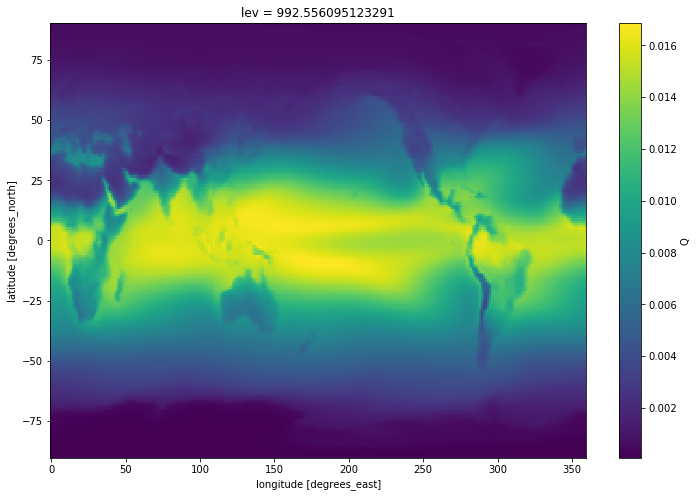

In [54]:
ds['Q'].isel(lev=29).mean(dim='time').plot(size=8);

In [2]:
ds = xr.open_dataset('/glade/scratch/molina/amoc_exp/b.e11.B1850LENS.f09_g16.FWAtSalG02Sv.pop.h.SST.000101-005012.nc')

In [16]:
# ds = xr.open_mfdataset('/glade/scratch/molina/amoc_exp/b.e11.B1850LENS.f09_g16.FWAtSalG02Sv.pop.h.SST.*.nc',combine='by_coords')

In [29]:
# ds

In [18]:
# ds['SST']

<xarray.DataArray 'SST' (time: 600, z_t: 1, nlat: 384, nlon: 320)>
[73728000 values with dtype=float32]
Coordinates:
    TLAT     (nlat, nlon) float64 ...
    TLONG    (nlat, nlon) float64 ...
    ULAT     (nlat, nlon) float64 ...
    ULONG    (nlat, nlon) float64 ...
  * time     (time) object 0001-02-01 00:00:00 ... 0051-01-01 00:00:00
  * z_t      (z_t) float32 500.0
Dimensions without coordinates: nlat, nlon
Attributes:
    grid_loc:      3111
    long_name:     Potential Temperature
    cell_methods:  time: mean
    units:         degC

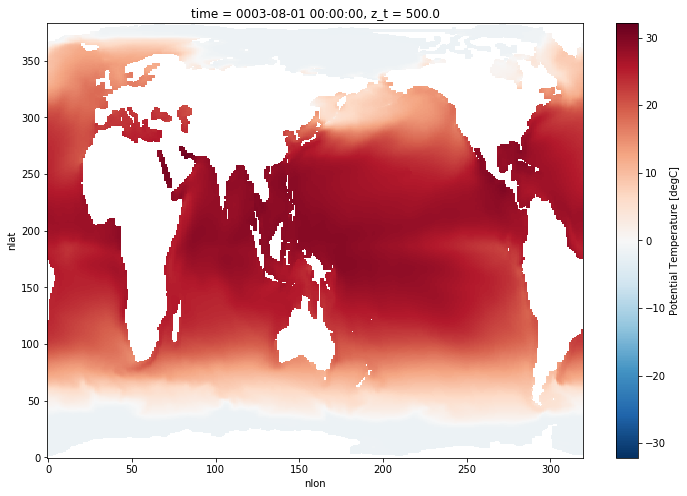

In [19]:
ds['SST'].isel(time=30,z_t=0).plot(size=8);

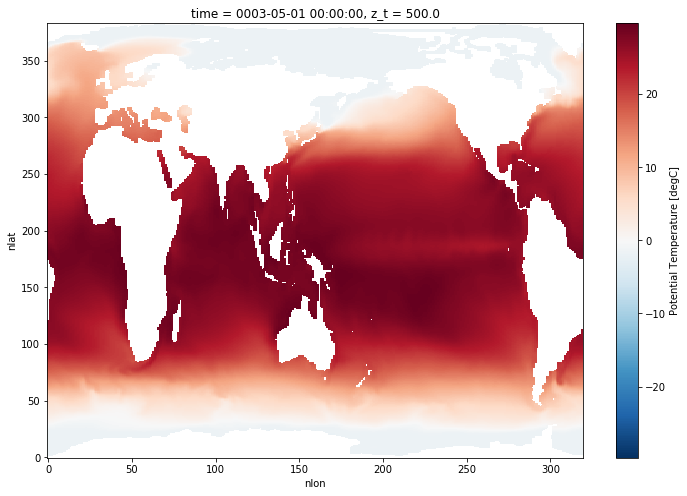

In [20]:
ds['SST'].isel(time=27,z_t=0).plot(size=8);

/glade/work/molina/miniconda3/envs/python-tutorial/lib/python3.7/site-packages/xarray/core/nanops.py:140: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


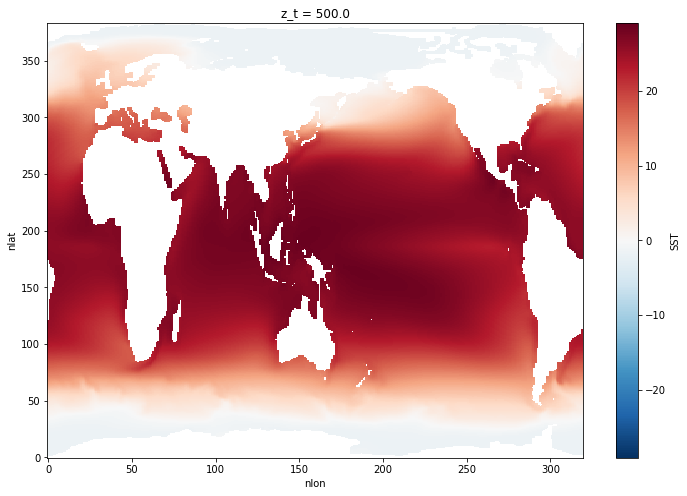

In [21]:
ds['SST'].isel(z_t=0).mean(dim='time').plot(size=8);

In [24]:
ds['SST'].isel(z_t=0)

<xarray.DataArray 'SST' (time: 600, nlat: 384, nlon: 320)>
[73728000 values with dtype=float32]
Coordinates:
    TLAT     (nlat, nlon) float64 ...
    TLONG    (nlat, nlon) float64 ...
    ULAT     (nlat, nlon) float64 ...
    ULONG    (nlat, nlon) float64 ...
  * time     (time) object 0001-02-01 00:00:00 ... 0051-01-01 00:00:00
    z_t      float32 500.0
Dimensions without coordinates: nlat, nlon
Attributes:
    grid_loc:      3111
    long_name:     Potential Temperature
    cell_methods:  time: mean
    units:         degC

In [25]:
ds_nino34 = ds.where((ds.TLAT<5) & (ds.TLAT>-5) & (ds.TLONG>190) & (ds.TLONG<240), drop=True)

In [8]:
ds

<xarray.Dataset>
Dimensions:               (d2: 2, lat_aux_grid: 395, moc_comp: 3, moc_z: 61, nlat: 384, nlon: 320, time: 600, transport_comp: 5, transport_reg: 2, z_t: 1, z_t_150m: 15, z_w: 60, z_w_bot: 60, z_w_top: 60)
Coordinates:
    TLAT                  (nlat, nlon) float64 ...
    TLONG                 (nlat, nlon) float64 ...
    ULAT                  (nlat, nlon) float64 ...
    ULONG                 (nlat, nlon) float64 ...
  * lat_aux_grid          (lat_aux_grid) float32 -79.48815 -78.952896 ... 90.0
  * moc_z                 (moc_z) float32 0.0 1000.0 ... 525000.94 549999.06
  * time                  (time) object 0001-02-01 00:00:00 ... 0051-01-01 00:00:00
  * z_t                   (z_t) float32 500.0
  * z_t_150m              (z_t_150m) float32 500.0 1500.0 ... 13500.0 14500.0
  * z_w                   (z_w) float32 0.0 1000.0 2000.0 ... 500004.7 525000.94
  * z_w_bot               (z_w_bot) float32 1000.0 2000.0 ... 549999.06
  * z_w_top               (z_w_top) float32 0.0 1000.0 ... 500004.7 525000.94
Dimensions without coordinates: d2, moc_comp, nlat, nlon, transport_comp, transport_reg
Data variables:
    ANGLE                 (nlat, nlon) float64 ...
    ANGLET                (nlat, nlon) float64 ...
    DXT                   (nlat, nlon) float64 ...
    DXU                   (nlat, nlon) float64 ...
    DYT                   (nlat, nlon) float64 ...
    DYU                   (nlat, nlon) float64 ...
    HT                    (nlat, nlon) float64 ...
    HTE                   (nlat, nlon) float64 ...
    HTN                   (nlat, nlon) float64 ...
    HU                    (nlat, nlon) float64 ...
    HUS                   (nlat, nlon) float64 ...
    HUW                   (nlat, nlon) float64 ...
    KMT                   (nlat, nlon) float64 ...
    KMU                   (nlat, nlon) float64 ...
    REGION_MASK           (nlat, nlon) float64 ...
    T0_Kelvin             float64 ...
    TAREA                 (nlat, nlon) float64 ...
    UAREA                 (nlat, nlon) float64 ...
    cp_air                float64 ...
    cp_sw                 float64 ...
    days_in_norm_year     timedelta64[ns] ...
    dz                    (z_t) float32 ...
    dzw                   (z_w) float32 ...
    fwflux_factor         float64 ...
    grav                  float64 ...
    heat_to_PW            float64 ...
    hflux_factor          float64 ...
    latent_heat_fusion    float64 ...
    latent_heat_vapor     float64 ...
    mass_to_Sv            float64 ...
    moc_components        (moc_comp) |S256 ...
    momentum_factor       float64 ...
    nsurface_t            float64 ...
    nsurface_u            float64 ...
    ocn_ref_salinity      float64 ...
    omega                 float64 ...
    ppt_to_salt           float64 ...
    radius                float64 ...
    rho_air               float64 ...
    rho_fw                float64 ...
    rho_sw                float64 ...
    salinity_factor       float64 ...
    salt_to_Svppt         float64 ...
    salt_to_mmday         float64 ...
    salt_to_ppt           float64 ...
    sea_ice_salinity      float64 ...
    sflux_factor          float64 ...
    sound                 float64 ...
    stefan_boltzmann      float64 ...
    time_bound            (time, d2) object ...
    transport_components  (transport_comp) |S256 ...
    transport_regions     (transport_reg) |S256 ...
    vonkar                float64 ...
    SST                   (time, z_t, nlat, nlon) float32 ...
Attributes:
    nsteps_total:    840
    tavg_sum:        2592000.0
    title:           b.e11.B1850LENS.f09_g16.FWAtSalG02Sv
    start_time:      This dataset was created on 2018-02-20 at 21:18:40.0
    history:         none
    Conventions:     CF-1.0; http://www.cgd.ucar.edu/cms/eaton/netcdf/CF-curr...
    source:          CCSM POP2, the CCSM Ocean Component
    cell_methods:    cell_methods = time: mean ==> the variable values are av...
    calendar:        All years have exactly  365 days

In [3]:
ds_nino34 = enso.nino(data=ds, nino='nino34', lats='TLAT', lons='TLONG')

In [6]:
enso.check_nino(ds_nino34, lats='TLAT', lons='TLONG')

Check we have the correct spatial extent
Latitude range: -4.9 - 5.0
Longitude range: -169.9 - -120.4


In [41]:
yay=nino_dict(nino='nino12')

In [42]:
yay

array([-10,   0, 270, 280])

In [28]:
#ds_nino34['SST']

Check we have the correct spatial extent
Latitude range: -4.9 - 5.0
Longitude range: 190.1 - 239.6


In [110]:
ds_nino34_climo = ds_nino34['SST'].isel(z_t=0).groupby('time.month').mean('time')

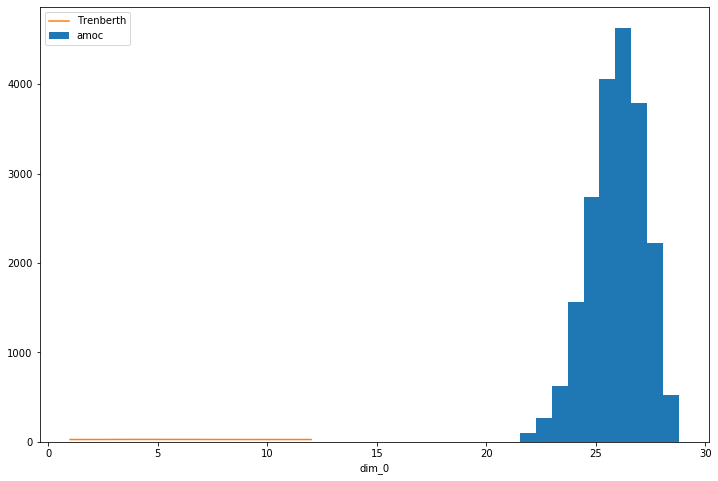

In [111]:
import matplotlib.pyplot as plt
ds_nino34_climo.plot(size=8,label='amoc')
mean_sst_trenberth = xr.DataArray([26.4, 26.6, 27.1, 27.6, 27.5, 27.4, 27.0, 26.7, 26.4, 26.5, 26.4, 26.4], coords=[np.arange(12)+1])
mean_sst_trenberth.plot(label="Trenberth")
plt.legend()

In [128]:
index_nino34 = (ds_nino34['SST'].isel(z_t=0).groupby('time.month')-ds_nino34_climo).mean(dim=['nlat','nlon'])

/glade/work/molina/miniconda3/envs/python-tutorial/lib/python3.7/site-packages/xarray/core/common.py:664: FutureWarning: This DataArray contains multi-dimensional coordinates. In the future, the dimension order of these coordinates will be restored as well unless you specify restore_coord_dims=False.
  self, group, squeeze=squeeze, restore_coord_dims=restore_coord_dims


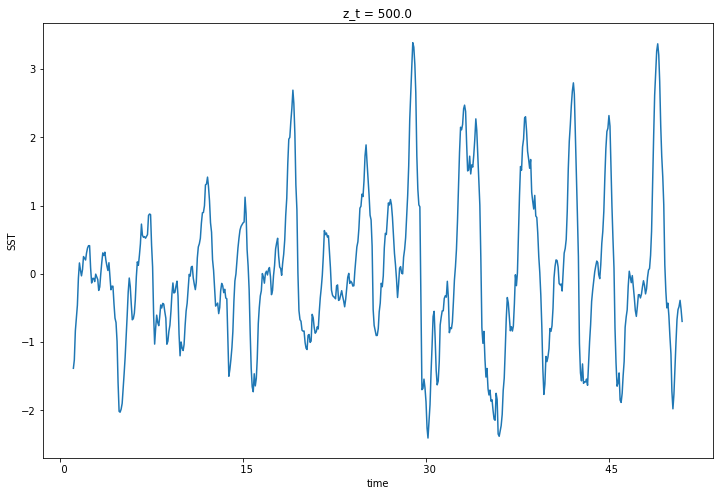

In [130]:
index_nino34.plot(size=8)

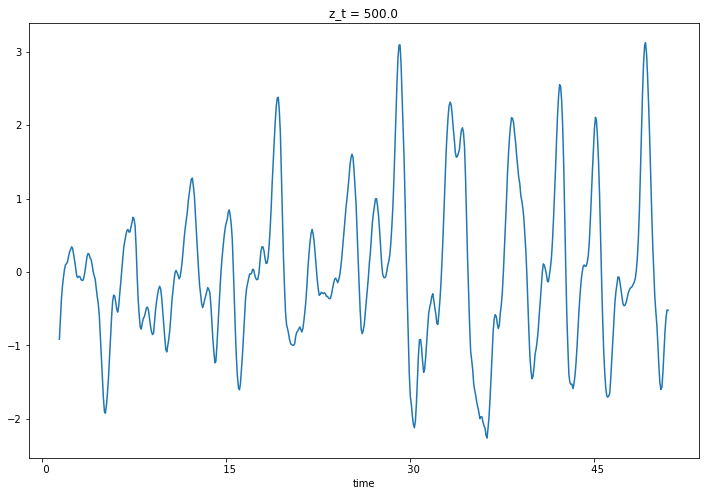

In [131]:
index_nino34.rolling(time=5).mean().plot(size=8)

In [132]:
ds_nino34_climo_std = ds_nino34['SST'].isel(z_t=0).std()

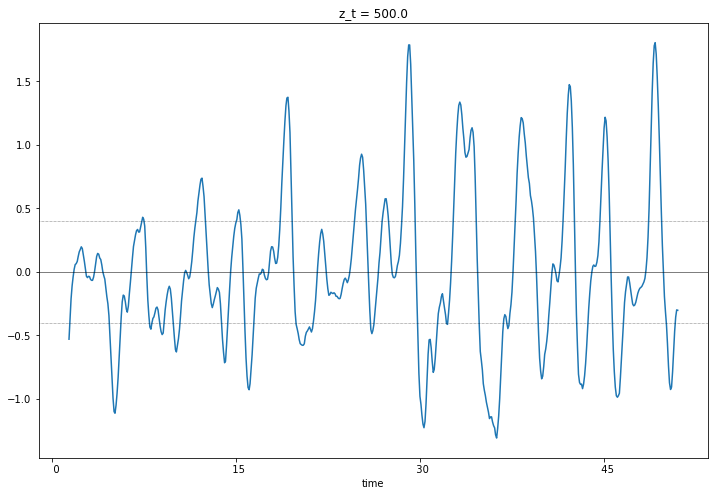

In [135]:
(index_nino34.rolling(time=5).mean() / ds_nino34_climo_std).plot(size=8)
plt.axhline(0,color='black',lw=0.5)
plt.axhline(0.4,color='black',linewidth=0.5,linestyle='dotted')
plt.axhline(-0.4,color='black',linewidth=0.5,linestyle='dotted')

In [137]:
tmp = (index_nino34.rolling(time=5).mean() / ds_nino34_climo_std)

Text(0.5, 1.0, 'Nino 3.4 Region (Threshold = 0.4 $\\degree$C)')

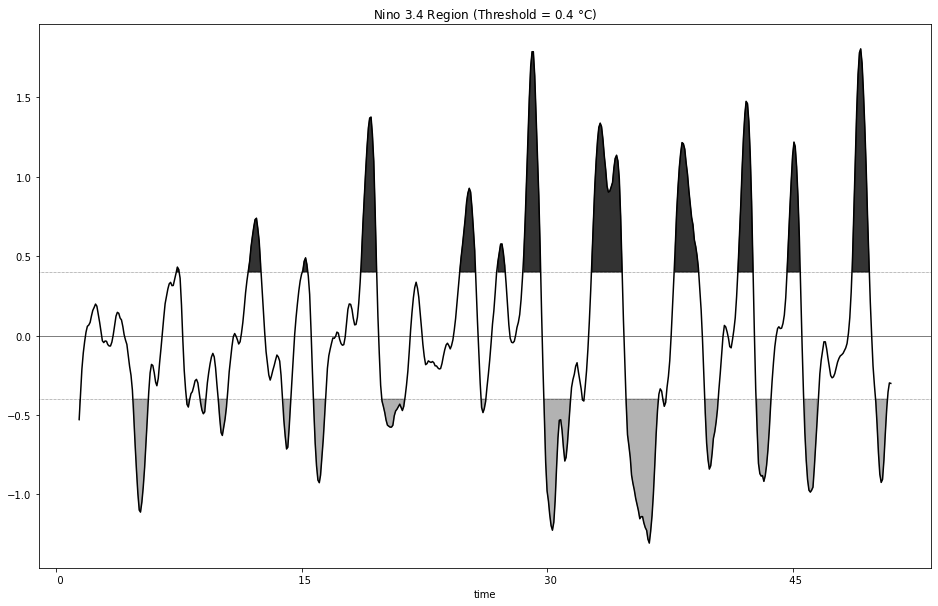

In [138]:
fig = plt.figure(figsize=(16, 10))
plt.fill_between(tmp.time.values, tmp.where(tmp>=0.4).values, 0.4, color='black', alpha=0.8)
plt.fill_between(tmp.time.values, tmp.where(tmp<=-0.4).values, -0.4, color='black', alpha=0.3)
# plt.fill_between(tmp.time.values, tmp.where(tmp<0.4,0.4).where(tmp>-0.4,-0.4).values, color='white')
tmp.plot(color='black')
plt.axhline(0,color='black',lw=0.5)
plt.axhline(0.4,color='black',linewidth=0.5,linestyle='dotted')
plt.axhline(-0.4,color='black',linewidth=0.5,linestyle='dotted')
plt.title('Nino 3.4 Region (Threshold = 0.4 $\degree$C)')

In [139]:
"Percentage of El Nino events = {:0.1f}%".format(100 * (tmp.where(tmp>=0.4).count() / tmp.count()).values)

'Percentage of El Nino events = 22.7%'

In [140]:
"Percentage of La Nina events = {:0.1f}%".format(100 * (tmp.where(tmp<=-0.4).count() / tmp.count()).values)

'Percentage of La Nina events = 25.3%'